<a href="https://colab.research.google.com/github/WanDz03/SMJE4313/blob/main/Wan_contours_coins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **In this code, we are going to explore about contours. A contour is a curve of points, with no gaps in the curve.**

First we need to mount our code with google drive.

In [1]:
# To mount code with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import all the package that we will use for the code.

In [2]:
# Import the necessary packages
from __future__ import print_function
import numpy as np
import argparse
import cv2
from google.colab.patches import cv2_imshow

Set the path for the image that we will use for testing the code.

When you mount the code, folder **"drive"** will appear on the left screen when you click the **"file"** symbol. Then you just need to find the image in your drive and right click on that image.

A pop up will show some list then just click **"copy path"**. After that you just need to paste the path here.

In [3]:
# Construct the argument parser and parse the arguments
args = {
	# Task 1
	"image": "/content/drive/MyDrive/Colab Notebooks/SMJE4313 Image Processing/image/coins.png"
}

Now that we have the path to the image, we can load it off the disk using the cv2.imread function on Line 2. The cv2.imread function returns a NumPy array representing the image.

On line 3, we convert the image into grayscale and apply gaussian blur on line 4.

Then, displaying the actual image on our screen. The parameter is a reference to the image we convert before.

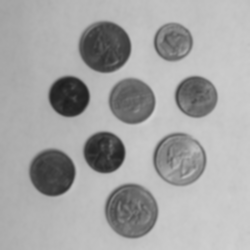

In [4]:
# Task 2
# Load the image, convert to grayscale & applying Gaussian blur
image = cv2.imread(args["image"])
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (5, 5), 0)
cv2_imshow(blurred)

We then obtain the edged image by applying the Canny edge detector on Line 3.

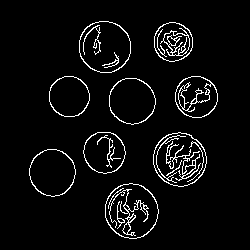

In [5]:
# The first thing we are going to do is apply edge detection to
# the image to reveal the outlines of the coins by applying
# Taks 3 - apply Canny Edge
edged = cv2.Canny(blurred, 30, 150)
cv2_imshow(edged)

Now that we have the outlines of the coins, we can ﬁnd the contours of the outlines. We do this using the cv2.findContours function on Line 5. This method returns a 3-tuple of: (1) our image after applying contour detection (which is modiﬁed and essentially destroyed), (2) the contours themselves, cnts, and (3) the hierarchy of the contours.

The ﬁrst argument to cv2.findContours is our edged image. It’s important to note that this function is destructive to the image you pass in. If you intend using that image later on in your code, it’s best to make a copy of it, using the NumPy copy method.

The second argument is the type of contours we want. We use cv2.RETR_EXTERNAL to retrieve only the outermost contours (i.e., the contours that follow the outline of the coin).

Our last argument is how we want to approximate the contour. We use cv2.CHAIN_APPROX_SIMPLE to compress horizontal, vertical, and diagonal segments into their end- points only. This saves both computation and memory.

In [6]:
# Find contours in the edged image.
# NOTE: The cv2.findContours method is DESTRUCTIVE to the image
# you pass in. If you intend on reusing your edged image, be
# sure to copy it before calling cv2.findContours

# Task 4 - Get the contours
(cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# How many contours did we find?
print("I count {} shapes in this image".format(len(cnts)))

I count 9 shapes in this image


Now, we are able to draw our contours. In order not to draw on our original image, we make a copy of the original image, called coins on Line 3.

A call to cv2.drawContoursdraws the actual contours on our image. The ﬁrst argument to the function is the image we want to draw on. The second is our list of contours. Next, we have the contour index. By specifying a negative value of -1, we are indicating that we want to draw all of the contours. However, we would also supply an index i, which would be the i’th contour in cnts. This would allow us to draw only a single contour rather than all of them.

The fourth argument to the cv2.drawContours function is the color of the line we are going to draw. Here, we use a green color.

Finally, our last argument is the thickness of the line we are drawing. We’ll draw the contour with a thickness of two pixels.

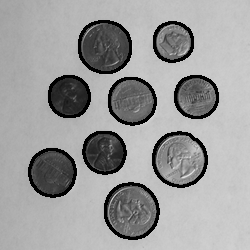

In [7]:
# Let's highlight the coins in the original image by drawing a
# green circle around them
shapes = image.copy()
# Task 5 - draw contours
cv2.drawContours(shapes, cnts, -1, (0, 255, 0), 2)
cv2_imshow(shapes)

We start off on Line 2 by looping over our contours.

We then use the cv2.boundingRect function on the cur- rent contour. This method ﬁnds the “enclosing box” that our contour will ﬁt into, allowing us to crop it from the image. The function takes a single parameter, a contour, and then returns a tuple of the x and y position that the rectangle starts at, followed by the width and height of the rectangle.

We then crop the coin from the image using our bounding box coordinates and NumPy array slicing on Line 10. The coin itself is shown to us on Line 11.

We ﬁrst initialize our mask on Line 15 as a NumPy array of zeros, with the same width and height of our original image.

A call to cv2.minEnclosingCircleon Line 16 ﬁts a circle to our contour. We pass in a circle variable, the current contour, and are given the x and y coordinates of the circle, along with its radius.

Using the (x, y) coordinates and the radius, we can draw a circle on our mask, representing the coin.

We then crop the mask in the exact same manner as we cropped the coin on Line 18.

In order to show only the foreground of the coin and ignore the background, we make a call to our trusty bitwise AND function using the coin image and the mask for the coin. The coin, with the background removed, is shown to us on Line 19.

shape #1


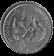

shape #2


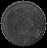

shape #3


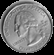

shape #4


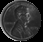

shape #5


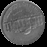

shape #6


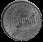

shape #7


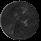

shape #8


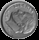

shape #9


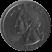

In [8]:
# Now, let's loop over each contour
for (i, c) in enumerate(cnts):
	# We can compute the 'bounding box' for each contour, which is
	# the rectangle that encloses the contour
	(x, y, w, h) = cv2.boundingRect(c)

	# Now that we have the contour, let's extract it using array
	# slices
	print("shape #{}".format(i + 1))

	shapes = image[y:y + h, x:x + w]

	# Just for fun, let's construct a mask for the shapes by finding
	# The minumum enclosing circle of the contour
	mask = np.zeros(image.shape[:2], dtype = "uint8")
	((centerX, centerY), radius) = cv2.minEnclosingCircle(c)
	cv2.circle(mask, (int(centerX), int(centerY)), int(radius), 255, -1)
	mask = mask[y:y + h, x:x + w]
	cv2_imshow(cv2.bitwise_and(shapes, shapes, mask = mask))

